In [ ]:
import pandas as pd
import numpy as np
import json

In [ ]:
# loading keywords, adjacency list and abstracts into data frames
with open('adjacency_list.json') as fp:
  adj = json.load(fp)

keywords = pd.read_csv('modified_keywords.csv')
abstracts = pd.read_csv('modified_abstracts.csv')
abstracts = abstracts.replace(np.nan, '', regex=True)
print(keywords.iloc[:,0])

0                  machine_learning
1                 genetic_algorithm
2                    classification
3                     deep_learning
4                       data_mining
                    ...            
19995    genetic_algorithm_approach
19996                 learning_tool
19997                  data_channel
19998        quality_characteristic
19999                schema_version
Name: 0, Length: 20000, dtype: object


In [ ]:
# Converting everything to lists cuz pandas are slow
keywords_list = keywords.iloc[:,0].values.tolist()
abs_list = abstracts.iloc[:,0].values.tolist()

print(keywords_list[0])
print(abs_list[1237])

machine_learning
scattering recombination frequency signal visibility large-scale polarization correlation measurement component noise cosmic variance temperature power measure consistency_check it can perturbation tensor mode power_spectrum


In [ ]:
# Converting the adjacency list to a dataframe so that we can convert it into a graph with StellarGraph

# NOT A TIME TAKING CELL - cuz last time I was stupid enough to append to a dataframe
# initialising a df in the expected format
# Edges = pd.DataFrame(np.nan, index=range(0,4000000), columns=["source","target","weight",])

# cnt=0
# for word1 in adj:
#   for word2 in adj[word1]:
#     #if (word1,word2) not in visited and (word2,word1) not in visited:
#     cnt+=1
#     if(cnt%1000==0):
#       print(cnt)
#     temp = {'source': word1, 'target': word2, 'weight': adj[word1][word2]}
#     Edges.iloc[cnt-1] = temp

Edges = []

cnt=0
for word1 in adj:
  for word2 in adj[word1]:
    #if (word1,word2) not in visited and (word2,word1) not in visited:
    cnt+=1
    if(cnt%5000==0):
      print(cnt)
    temp = [word1,word2,adj[word1][word2]]
    Edges.append(temp)

Edges_df = pd.DataFrame(Edges, columns=['source','target','weight'])
Edges_df.head()
Edges = Edges_df

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705000
710000
715000
720000
725000
73000

In [ ]:
# Dropping all useless nodes and saving to a file

Edges = Edges.dropna()
Edges = Edges.drop(labels=0, axis=0)
Edges = Edges.reset_index(drop=True)
Edges.to_csv('Edges.csv', index=False)

In [ ]:
Edges.head()

,source,target,weight
0,machine_learning,stochastic_optimization,5
1,machine_learning,use,385
2,machine_learning,stochastic,51
3,machine_learning,programming,21
4,machine_learning,learning,321


In [ ]:
Edges.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552253 entries, 0 to 5552252
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   source  object
 1   target  object
 2   weight  int64 
dtypes: int64(1), object(2)
memory usage: 765.2 MB


In [ ]:
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

     |████████████████████████████████| 440kB 4.5MB/s 
     |████████████████████████████████| 235kB 17.7MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 


In [ ]:
from stellargraph import StellarGraph

In [ ]:
Edges['weight'] = pd.to_numeric(Edges['weight'])
Graph = StellarGraph(edges=Edges)
print(Graph.info())

StellarGraph: Undirected multigraph
 Nodes: 13988, Edges: 5552253

 Node types:
  default: [13988]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [5552253]
        Weights: range=[1, 18808], mean=9.23249, std=65.7269
        Features: none


In [ ]:
#importing all the modules from the documentation tutorial
#TODO : Remove all the unnecessary ones

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing

from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec
import warnings
import collections

from IPython.display import display, HTML
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Have to experiment with different walk lengths
walk_length = 500

In [ ]:
# # Plotting the weights distribution
# _, weights = Graph.edges(include_edge_weight=True)

# wt, cnt = np.unique(weights, return_counts=True)
# #print(cnt)

# plt.axis([0,10,0,10])
# plt.figure(figsize=(10, 8))
# plt.bar(wt, cnt, width=0.005, color="b")
# plt.title("Edge weights histogram")
# plt.ylabel("Count")
# plt.xlabel("edge weights")
# plt.xticks(np.linspace(0, 1, 10))

# plt.show()
# plt.close()

In [ ]:
# Creating the biased random walks

rw = BiasedRandomWalk(Graph)
weighted_walks = rw.run(
    nodes=Graph.nodes(),  # root nodes
    length=walk_length,  # maximum length of a random walk
    n=50,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    #seed=42,  # random seed fixed for reproducibility
)

In [ ]:
# Now that we have the context of nodes from the random walk, it behaves like a
# sentence and we can use Word2Vec on it to get a Graph Embedding
weighted_model = Word2Vec(
    weighted_walks, size=128, window=5, min_count=0, sg=1, workers=1, iter=1
)

In [ ]:
# Testing the embedding of some node

emb = weighted_model.wv["machine_learning"]
print(emb)

[ 1.02409263e-04  2.18320242e-03  2.08406197e-03  1.75184431e-03
 -1.59095600e-03  7.42586999e-05  1.50741625e-03 -2.00036191e-03
 -2.43708561e-03 -1.13824586e-04  3.03731998e-03  3.80714238e-03
  3.85677489e-03  2.75258441e-03 -9.20982275e-05  2.60232645e-03
 -1.80447020e-03 -3.17760929e-03  1.45843532e-03  2.83907307e-03
  2.90856115e-03 -2.89589894e-04  2.83894315e-03 -9.22704567e-05
  2.53988174e-03 -1.54663995e-03  1.32877647e-03 -2.06905766e-03
  1.66493899e-03  1.32335711e-03  6.50783186e-04  3.12017452e-04
 -2.37667956e-03  3.79999146e-05 -3.17804748e-03  8.73960496e-04
 -1.15138688e-03  2.31182226e-03  1.94887957e-03 -3.34859826e-03
 -1.54340174e-03  2.17142305e-03 -2.39671487e-03  2.56489892e-03
  2.34114728e-03 -6.39769190e-04  2.92514218e-03 -6.86345389e-04
  1.73038407e-03  3.32175125e-03 -3.20011098e-03  6.60267833e-04
 -1.19972450e-03  3.72284820e-04 -1.58807758e-04  7.26880447e-04
 -3.87585280e-03 -1.20952679e-03 -3.63903795e-03 -3.17951106e-03
 -1.24485197e-03  1.05969

In [ ]:
# Visualising the nodes by compressing them into a 2D space

# Retrieve node embeddings and corresponding subjects
node_ids = weighted_model.wv.index2word  # list of node IDs

weighted_node_embeddings = (
    weighted_model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality

In [ ]:
# TIME TAKING CELL - approximately three and a half minutes
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2, random_state=42)
weighted_node_embeddings_2d = tsne.fit_transform(weighted_node_embeddings)

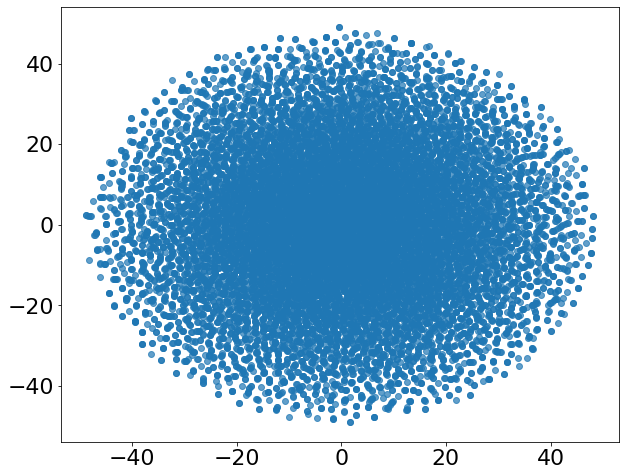

In [ ]:
# draw the points
plt.rcParams.update({'font.size': 22})
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    weighted_node_embeddings_2d[:, 0],
    weighted_node_embeddings_2d[:, 1],
    cmap="jet",
    alpha=0.7,
)
plt.show()

In [ ]:
#weighted_model.wv.

SyntaxError: ignored

In [ ]:
# creating a map from keyword to vector

vector_map = {}
for id in node_ids:
  vector_map[id] = weighted_model.wv[id]

In [ ]:
# Storing the mapped keywords to vectors in a pickle file

import pickle
node_vector_file = open('node_vectors.pickle', 'wb')
pickle.dump(vector_map, node_vector_file)

In [ ]:
# This is the easiest way to load from a pickle file
file_to_read = open("node_vectors.pickle", "rb")
loaded_dictionary = pickle.load(file_to_read)

In [ ]:
loaded_dictionary['machine_learning']

array([ 1.02409263e-04,  2.18320242e-03,  2.08406197e-03,  1.75184431e-03,
       -1.59095600e-03,  7.42586999e-05,  1.50741625e-03, -2.00036191e-03,
       -2.43708561e-03, -1.13824586e-04,  3.03731998e-03,  3.80714238e-03,
        3.85677489e-03,  2.75258441e-03, -9.20982275e-05,  2.60232645e-03,
       -1.80447020e-03, -3.17760929e-03,  1.45843532e-03,  2.83907307e-03,
        2.90856115e-03, -2.89589894e-04,  2.83894315e-03, -9.22704567e-05,
        2.53988174e-03, -1.54663995e-03,  1.32877647e-03, -2.06905766e-03,
        1.66493899e-03,  1.32335711e-03,  6.50783186e-04,  3.12017452e-04,
       -2.37667956e-03,  3.79999146e-05, -3.17804748e-03,  8.73960496e-04,
       -1.15138688e-03,  2.31182226e-03,  1.94887957e-03, -3.34859826e-03,
       -1.54340174e-03,  2.17142305e-03, -2.39671487e-03,  2.56489892e-03,
        2.34114728e-03, -6.39769190e-04,  2.92514218e-03, -6.86345389e-04,
        1.73038407e-03,  3.32175125e-03, -3.20011098e-03,  6.60267833e-04,
       -1.19972450e-03,  